# GAN: Generative Adverarial Networks 

GAN are a simple way and surprisingly efficient way to generate new date. 
<br> 

GAN are a type of generative model which combines neural networks and game theory to directly generate new samples. 

# Generative models 
Generative models create a probability distribution from a set of training examples by either:

1) Taking a set of points and infering a density function

2) Taking a training set, consisting of samples drawn from a distribution $p_{data}$, and learning to represent an estimate of that distribution somehow. The result is a probability distribution $p_{model}$


### Why are generative models important?
Why do we want to learn a distribution over a set of training examples?
- Can be used for planning by learning a conditional distribution over future states, given the current state  and possible actions.
  - For Reinforcement learning the agent can simulate an imaginary environment and learn without real world consequences.
  - For time-series data can simulate possible futures (route planning) 
<br>
<br>
- Can handle missing data well, or when many missing labels (eg semi-supervised learning)
<br>
<br>
- Can handle multi-modal outputs i.e. when a single input has many correct answers. For example next frame video prediciton. 
<br>
<br>
- **Image generation:** Super resolution realistic image generation, art creation, image-to-image translation

### Generative model examples 

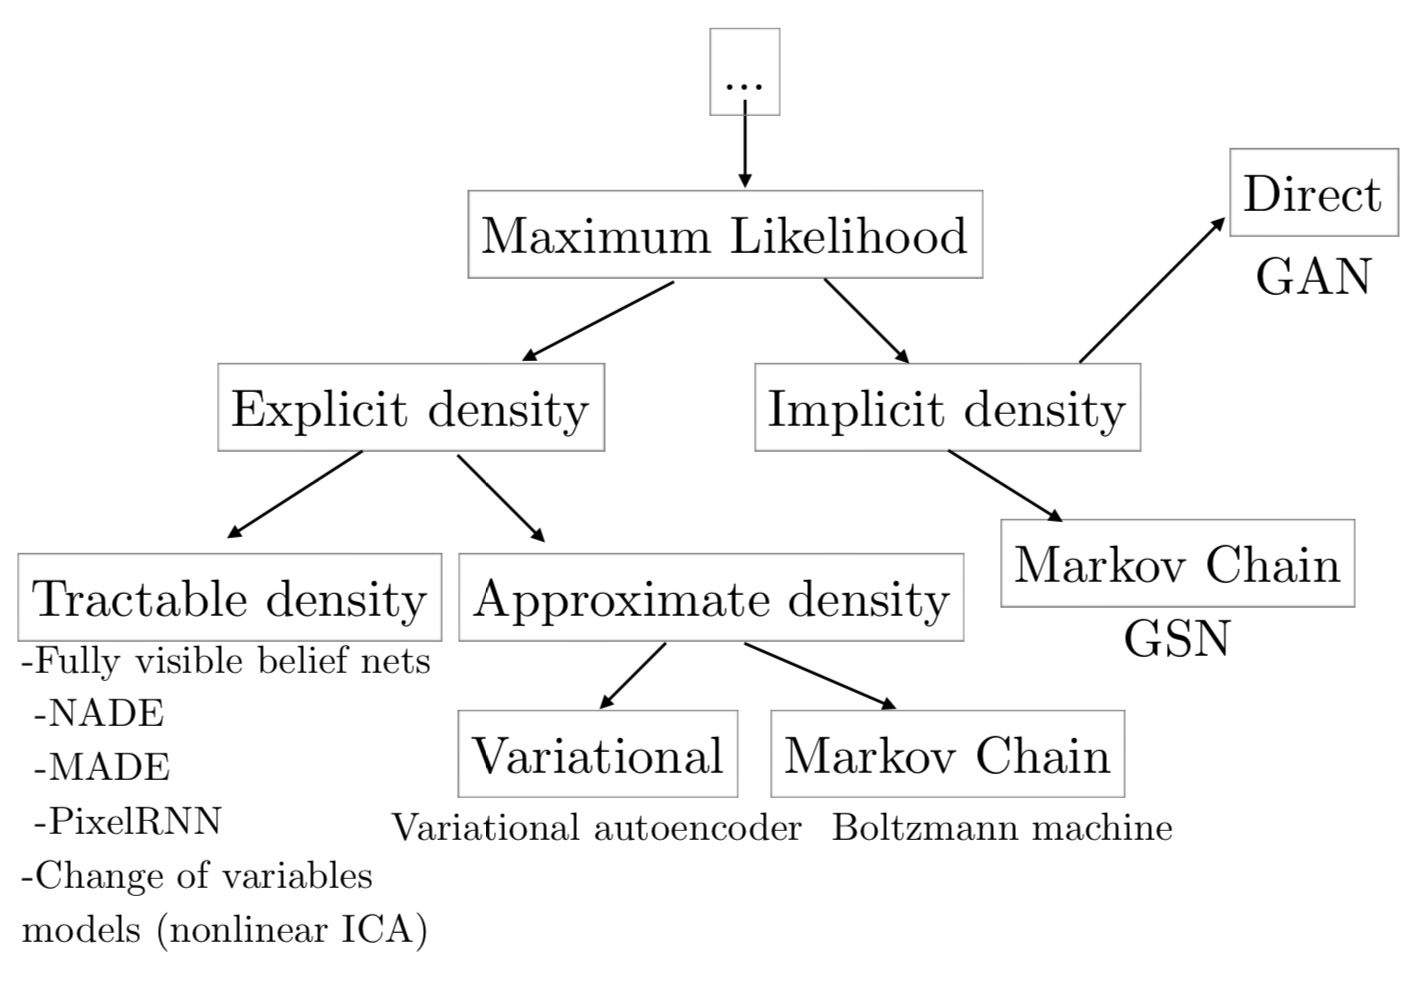

## Explict Density models

For these models maxmimization of the likelihood is straightforward 

Each model defines a density function which can give the likelihood, optimisation involves following the gradient.

The main difficulty is designing a model that can capture the complexity of the data to be generated while still maintaining computational tractability. 

There are two main strategies: 
- Tractable density: Careful construction of models whose structure guarantees their tractability. 
<br>
<br>
- Approximate denisty: Models that admit tractable approximations to the likelihood and its gradients.

#### Tractable density model:

These models define an explicit, tractable probability density. <br>They are highly effective because they permit the use of an optimization algorithm directly on the log-likelihood of the training data. 
<br><br>However, the family of models that can provide a tractable density is limited, with different families having different disadvantages.

#### Pixel RNN / CNN :
Given an image, model the likelihood of the i’th pixel / region given all previous pixels.
<br>**Pros**
<br>**$+$** Explicitly compute p(x)
<br>**$+$** Good samples
<br>
<br>**Cons**
<br>**$-$** Generation is sequential so slow (CNN faster than RNN but still slow)
<br>**$-$** Cannot be parallelised

#### Intractable density function:
**VAE:** 
<br>This method uses Bayes theorum. $$ p(z|x) = \frac{p(x|z)p(z)}{p(x)} $$ and calculates the evidence $p(x)$ by marginalising the latent variables $$p(x)=∫p(x∣z)p(z)dz$$ However this integral requires exponential time to compute, so is intractable. Therefore an approximatation is needed.

Variational methods get around this by defining a lower bound of a model. This lower bound is computationally tractable even when the log-likelihood is not. 
From this lower bound the true likelihood can be estimated. 

<br>**Pros**
<br>**$+$** Produce very good likelihood
<br>**$+$** Can easily compare models as output cost function is quantifiable (eg log-likelihood), whereas GAN output is subjective
<br>**$+$** Gives interpretable latent variables and collapses unneeded dimmensions
<br>
<br>**Cons**
<br>**$-$** Output examples less clear/blurry compared to GAN
<br>**$-$** When too weak posterior or prior distribution is used, even with a perfect optimiser, the gap between the lower bound and true likelihood can result in $ p_{(model)} $ learning something other than the true $p_{data}$.

### Implicit density models
#### Markov chain based models 
e.g. Boltzmann machines, Generative Stochastic model (GSN)

Most machine learning algorithms randomly sample from training examples. 
Some models can be trained without even needing to explicitly define a density functions. These models instead offer a way to train the model while interacting only indirectly with $p_{model}$, usually by sampling from it. 

Markov chains often fail to scale to high dimensional spaces and impose increased computational costs for using the generative model.

The log-likelihood is intractable, so cannot calculate loss directly.


## GAN

#### Example: Lotter, 2016
Mean Square Error compared to Adversarial: 
When output is multi-modal (where there are multiple possible correct answers), such as next frame prediction, MSE prediction is blurred as it averages over possibilities. 

When using an adversarial loss generative model the image is much crisper as the model is trying to find a great sample from a distribution rather than the mean of the distribution. 


A general goal for machine learning is to sample from complex, high dimensional training distribution. But often we cannot do this directly.
However can sample easily from random noise and then learn how to transform from noise to the training examples. This transformation can be done using a neural network. 

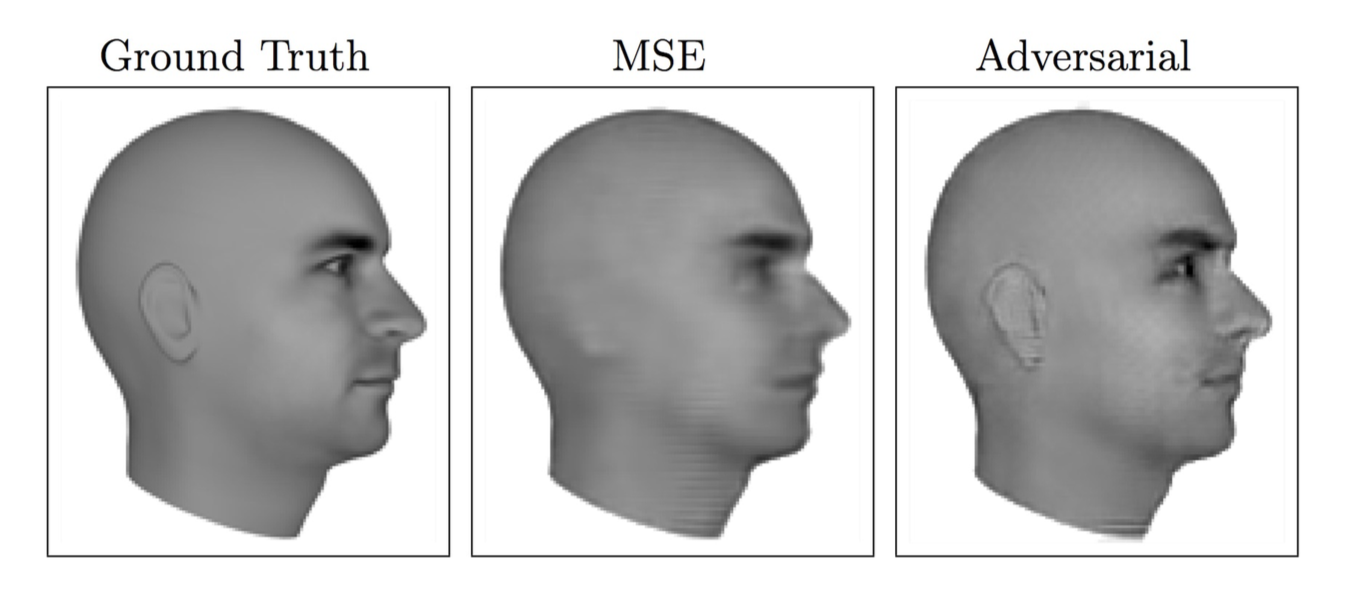

#### GANs were designed to avoid many disadvantages associated with other generative models:
**Pros**
- Can generate samples in parallel, so generation time proportional to dimensionally. This is an advantage relative to Pixel CNN.
- The design of the generator function has very few restrictions:
  - No Markov chains are needed. This is an advantage relative to Boltzmann machines and GSN.
  - No variational bound is needed

- GANs are known to be asymptotically consistent (VAE are conjectured to be asymptotically consistent, but this is not yet proven.
- Beautiful examples and a wide variety of different applications. Although quantification of quality is not easy, they are often regarded as superior. <br>

**Cons**
- Tricky to train as requires finding the Nash equilibrium of a game, which is more difficult than optimising the objective function. <br>
- Cannot solve inference queries such as $p(x), p(z|x)$.



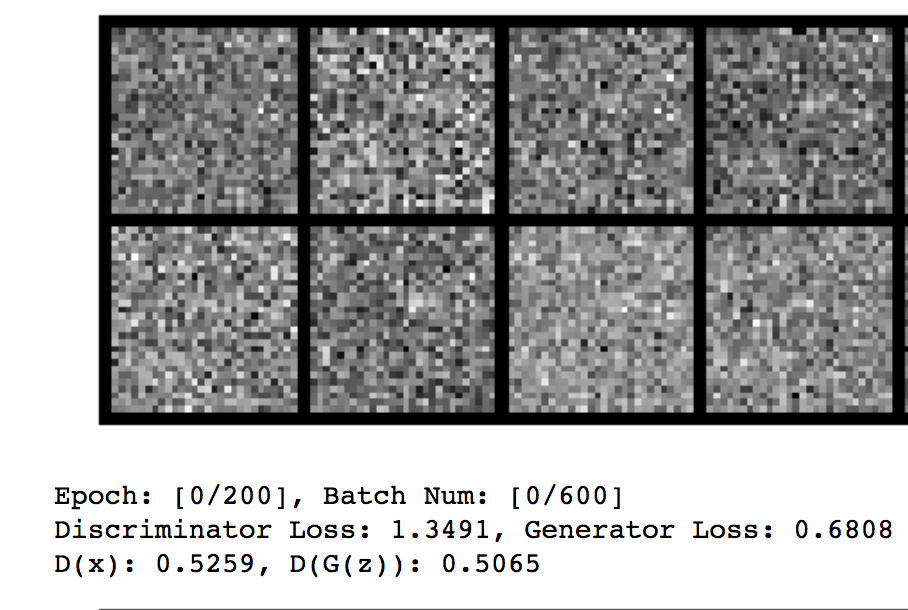

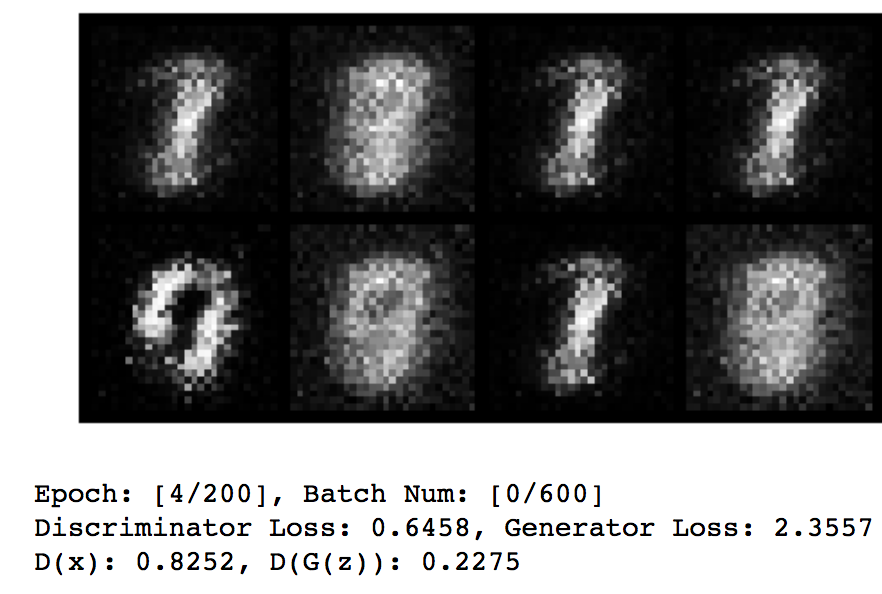

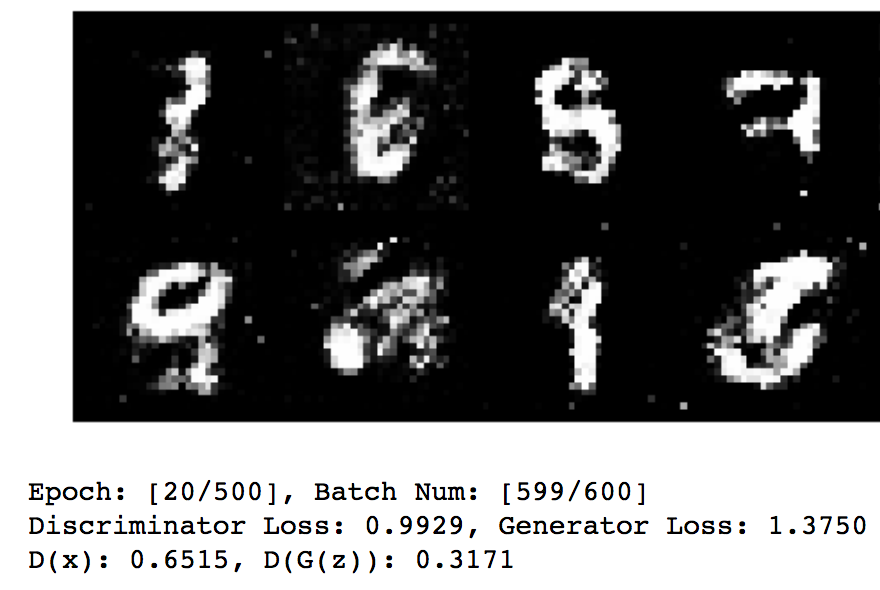

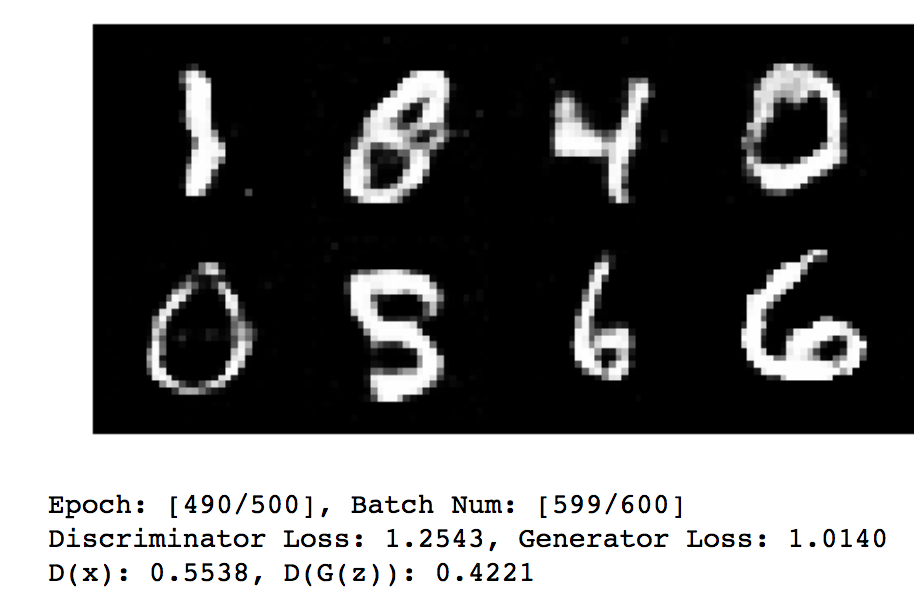

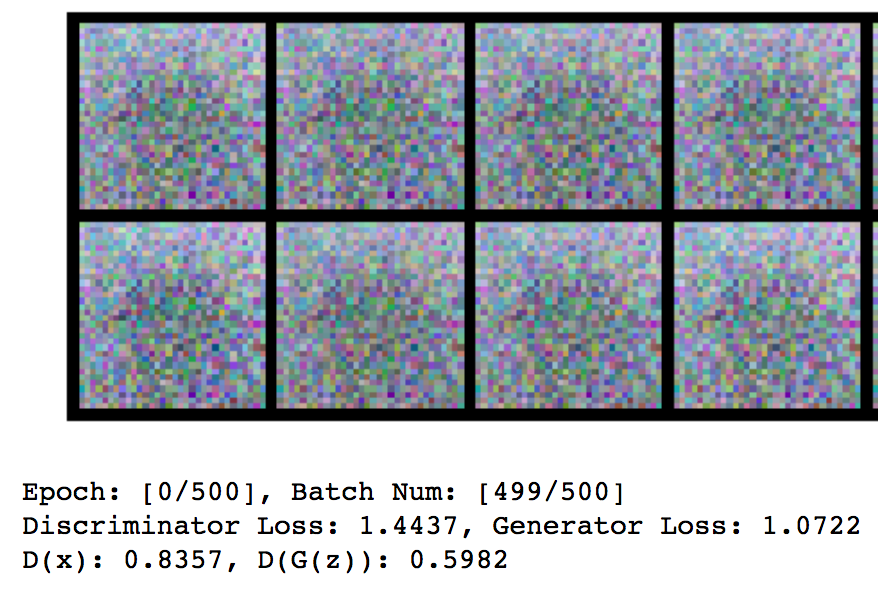

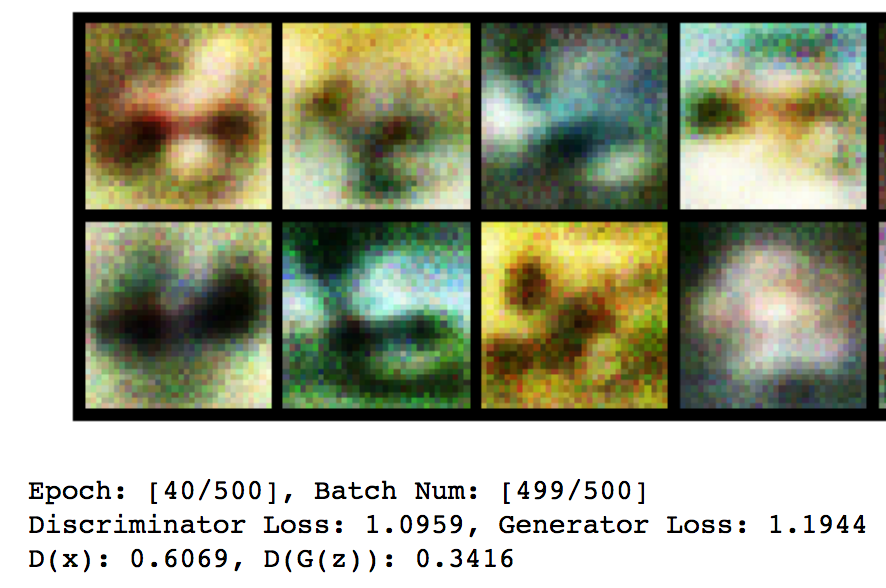

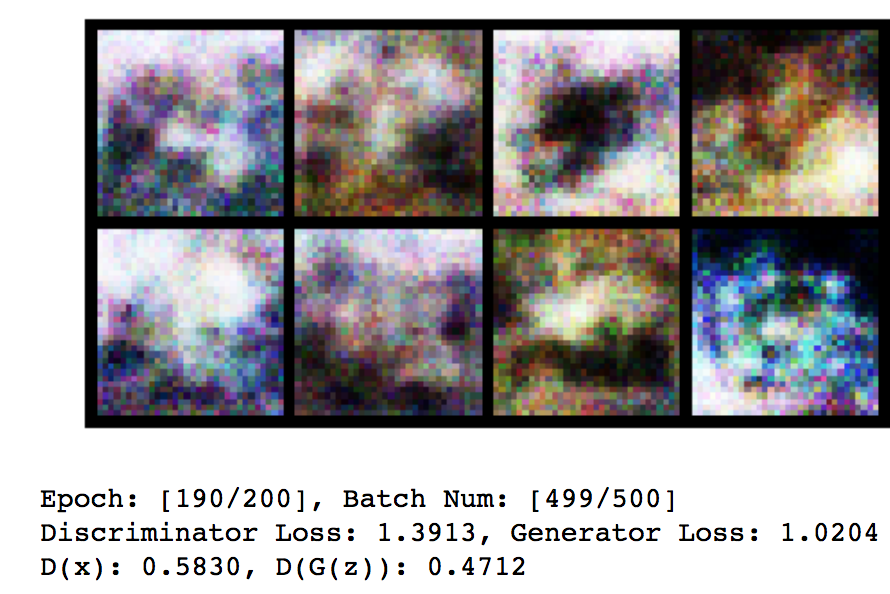